<a href="https://colab.research.google.com/github/ngupta23/inventory-stochastic/blob/main/Inventory%20Management%20-%20Stochastic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import warnings
import seaborn as sns
import scipy.stats as stats
import statsmodels.graphics.gofplots as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
warnings.filterwarnings('ignore')

In [3]:
# Unit Normal Loss Function
def unlf(k, sigma):
    result = stats.norm(0, 1).pdf(k) - k * (1-stats.norm(0, 1).cdf(k))
    return sigma * result

## Continuous Review Policy: Order Point, Order Quantity Policy (s,Q) 
### Method 1: Cycle Service Level (Probability of not stock out in a cycle) = 95%

In [4]:
# Demand = N(100, 15)
mu = 2000
sigma = 50
variance = sigma **2
# Days per year
T_total = 365
# Total Demand (units/year)
D = mu
# Demand per day (unit/day)
D_day = D/T_total
# Standard Deviation per day
sigma_Day = sigma /math.sqrt(T_total)
# Cost of item ($/unit)
c = 100
# Holding Cost (%/year)
h = 0.15
c_e = c * h
# Holding Cost (%/year)
h = 0.15
# Lead Time (days)
LD = 5
# Order Quantity Q*
Q = D_day * 15
# Weeks per year
T_total = 365
# Cost per Stock Out
B1 = 50000

# 1. We fix CSL = 95%
CSL = 0.95

# Average during lead time period
mu_ld = math.floor(mu * LD /(T_total))
print("Average demand during lead time: {:,} units".format(mu_ld))
# Standard deviation 
sigma_ld = sigma * math.sqrt(LD /(T_total))
print("Standard deviation during lead time: {:,} units".format(math.floor(sigma_ld)))
# Level of Service to fix k
k = round(stats.norm(0, 1).ppf(CSL),2)
print("k = {:,}".format(round(k, 2)))
# Reorder Point
s = mu_ld + k * sigma_ld
print("Reoder point with CSL: {:,} units".format(math.floor(s)))

Average demand during lead time: 27 units
Standard deviation during lead time: 5 units
k = 1.64
Reoder point with CSL: 36 units


### Method 2: Fix Item Fill Rate (IFR) = 99%

Find k for G(k) = 0.14
Optimal k value = 0.71
Reoder point with CSL: 31 units


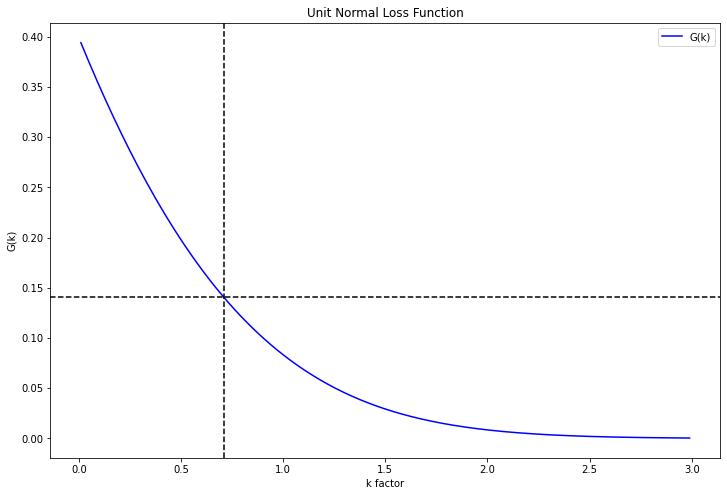

In [5]:
# G(k) = Q/sigma_ld * (1 - IFR)
IFR = 0.99
G_k = (Q/sigma_ld) * (1 - IFR)
print("Find k for G(k) = {:,}".format(round(G_k,3)))

# Find k
l1, l2 = [], []
for n in range(1, 300):
    k = n * 0.01
    l1.append(k)
    # Sigma = 1 to have sigma x G(k) = G(k)
    y = unlf(k, 1)
    l2.append(y)

df_result = pd.DataFrame({'k': l1,
                         'G(k)':l2})
df_result['delta'] = df_result['G(k)'] - G_k
# k = min(delta)
min_delta = df_result['delta'].abs().min()
k_final = df_result[df_result['delta'].abs() == min_delta]['k'].values[0]
print("Optimal k value = {:,}".format(k_final))

# Reodering point using CSOE
s = mu_ld + k_final * sigma_ld
print("Reoder point with CSL: {:,} units".format(math.floor(s)))

ax = plt.gca()
df_result.plot(figsize=(12,8), x="k", y="G(k)", ax = ax, color = 'blue')
plt.xlabel('k factor')
plt.ylabel('G(k)')
plt.axhline(G_k, color='black', linestyle="--")
plt.axvline(k_final, color='black', linestyle="--")
plt.title('Unit Normal Loss Function')
plt.show()